**Importing Libraries**

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading data into Environment**

In [2]:
data = pd.read_csv('/content/train_loan.csv')

**Preprocessing**

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Missing value handling**

In [7]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

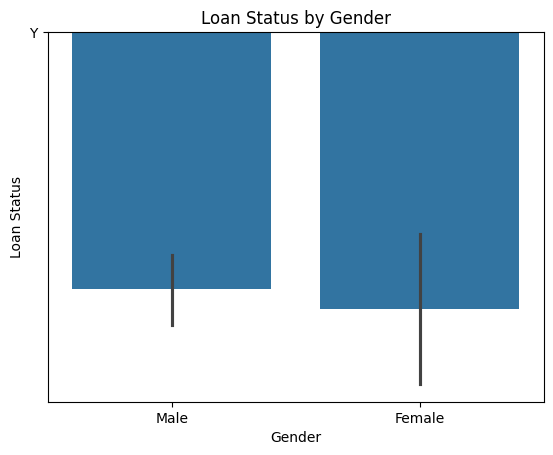

In [8]:
#barplot comparing Gender and Loan Status
sns.barplot(x="Gender", y="Loan_Status", data=data)

plt.title("Loan Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Loan Status")

plt.show()


In [9]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
#filling missing values with mode
mode_gender = data['Gender'].mode()[0]
data['Gender'].fillna(value=mode_gender, inplace=True)

In [11]:
# creating a count and a pivot table for loan status and credit history

temp1 = data['Credit_History'].value_counts(ascending=True)
temp2 = data.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x:
x.map({'Y':1, 'N':0}).mean())

print('Frequency Table for Credit History:')
print(temp1)

print('\nProbability of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


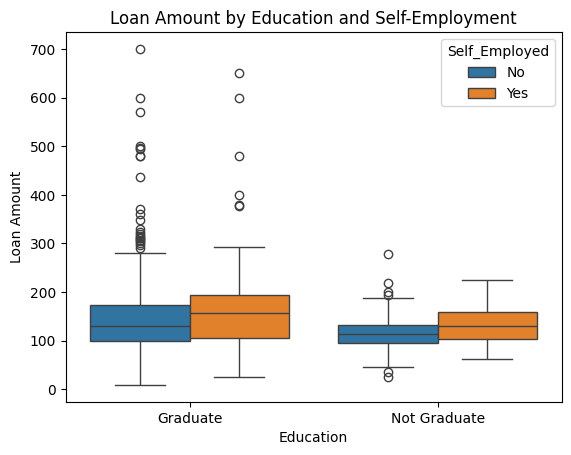

In [12]:
#Boxplot Comapring Loan Amount by Education and Self-Employment
sns.boxplot(x="Education", y="LoanAmount", hue="Self_Employed", data=data)

plt.title("Loan Amount by Education and Self-Employment")
plt.xlabel("Education")
plt.ylabel("Loan Amount")

plt.show()

In [13]:
#filling missing values with mode
mode_Self_Employed = data['Self_Employed'].mode()[0]
data['Self_Employed'].fillna(value=mode_Self_Employed, inplace=True)

In [14]:
# creating a pivot table to provide us the median values for all groups of Education and Self_Employed
table = data.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)

# a function to return the value of the pivot table
def fage(x):
    return table.loc[x['Self_Employed'], x['Education']]

# replacing missing values of Loan Amount with the median value of each groups (as per the frequency table below)
data['LoanAmount'].fillna(data[data['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)
print(table)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


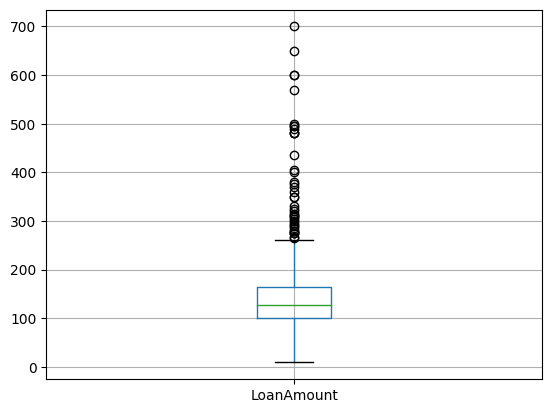

In [16]:
data.boxplot(column='LoanAmount')
plt.show()

In [17]:
#Pivot table for Gender and Marriage
table2 = data.pivot_table(values='Married', index='Gender', aggfunc=lambda x: x.map({'Yes':1, 'No':0}).mean())
table2

,Married
Gender,
Female,0.279279
Male,0.734000


In [18]:
# function to fill Married missing values with Yes if male and No if female
def fage2(x):
    if x['Gender'] == 'Male':
        return 'Yes'
    else:
        return 'No'

data['Married'].fillna(data[data['Married'].isnull()].apply(fage2,axis=1), inplace=True)

In [19]:
data['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [20]:
# Pivot table for  LoadID , Dependents and Married
table3 = data.pivot_table(values='Loan_ID',index='Dependents', columns='Married', aggfunc=len)
table3

Married,No,Yes
Dependents,,
0,171,174
1,23,79
2,8,93
3+,7,44


In [21]:
# function to fill Dependents missing values with 0 if not married and 1, 2, or 3+ if married
import random
def fage3(x):
    if x['Married'] == 'No':
        return 0
    else:
        return random.choice(['1', '2', '3+'])

data['Dependents'].fillna(data[data['Dependents'].isnull()].apply(fage3,axis=1), inplace=True)

In [22]:
data['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
240.0    0.006667
84.0     0.006667
120.0    0.005000
60.0     0.003333
36.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [23]:
data['Loan_Amount_Term'].fillna(360, inplace=True)

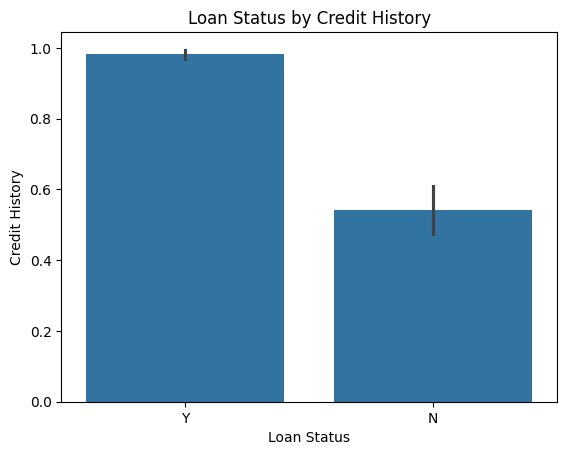

In [24]:
#barplot for Loan Status by Credit History
sns.barplot(x="Loan_Status", y="Credit_History", data=data)

plt.title("Loan Status by Credit History")
plt.xlabel("Loan Status")
plt.ylabel("Credit History")

plt.show()

In [25]:
#table comapring credit history and loan status
table4 = pd.crosstab(data['Credit_History'], data['Loan_Status'], normalize='index')
table4

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


In [26]:
data[pd.isnull(data['Credit_History'])]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,130.0,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [27]:
# filling missing values in Credit_History with '1.0' if Loan_Status is 'Y' and '0.0' if Loan_Status is 'N'

def fill_credit_history(row):
  if row['Loan_Status'] == 'Y':
    return 1.0
  elif row['Loan_Status'] == 'N':
    return 0.0
  else:
    return row['Credit_History']

data['Credit_History'] = data.apply(fill_credit_history, axis=1)


In [28]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Outlier Detection**

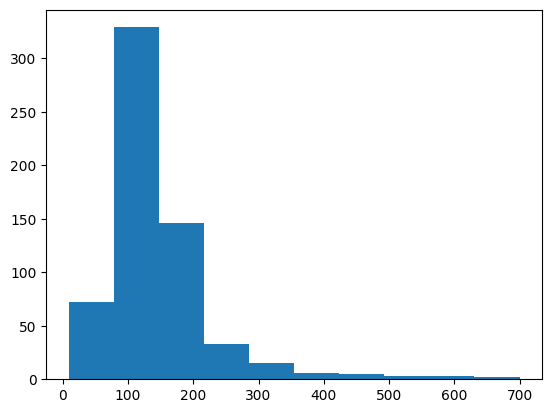

In [15]:
plt.hist(data['LoanAmount'])
plt.show()

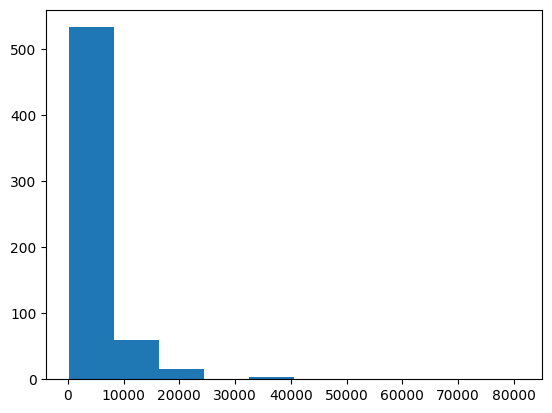

In [34]:
plt.hist(data['ApplicantIncome'])
plt.show()

In [29]:
# replace '3+' with 3 and change the datatype into integer
data['Dependents'].replace(['3+'], 3, inplace=True)
data['Dependents'] = data['Dependents'].astype(int)

In [31]:
#Creating an extra column called TotalIncome
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [32]:
data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2,1,5849.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,0.0,0,0,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,9613.0
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1,3849.0
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0,5540.0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1,5532.0
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,0.0,1,0,23809.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
 13  TotalIncome        614 non-null    float64
dtypes: float64(5), int64(8), object(1)
memory usage: 67.3+ KB


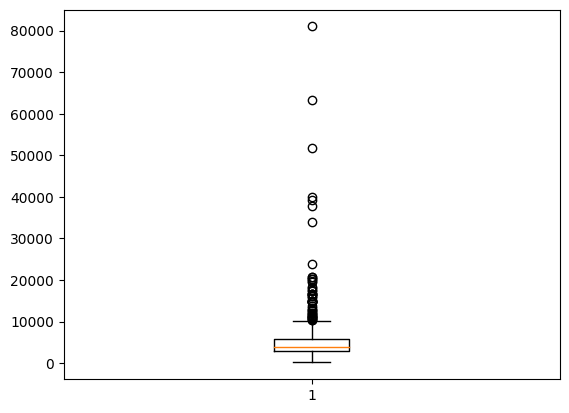

In [35]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

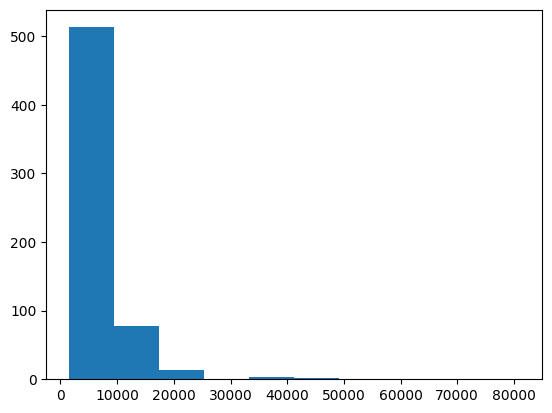

In [36]:
plt.hist(data['TotalIncome'])
plt.show()

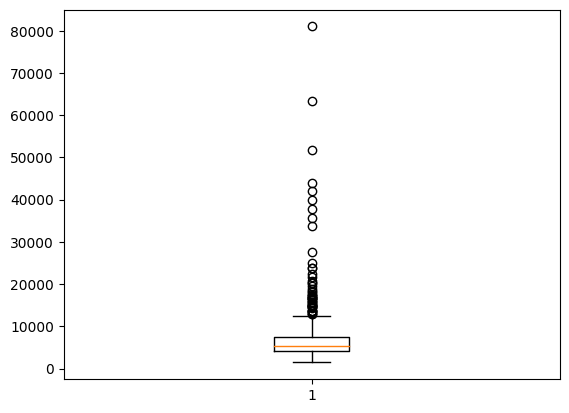

In [37]:
plt.boxplot(data['TotalIncome'])
plt.show()

**Outlier Handling**

In [38]:
#Outlier Handling for Total Income
q1 = data['TotalIncome'].quantile(0.25)
q2 = data['TotalIncome'].quantile(0.5)
q3 = data['TotalIncome'].quantile(0.75)

In [39]:
iqr=q3-q1

In [40]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [41]:
print(up_lim,low_lim)

12555.375 -867.625


In [42]:
def limt_imputer(value):
  if value>up_lim:
    return up_lim
  if value<low_lim:
    return low_lim
  else:
       return value

In [43]:
#applying the imputer function
data['TotalIncome']=data['TotalIncome'].apply(limt_imputer)

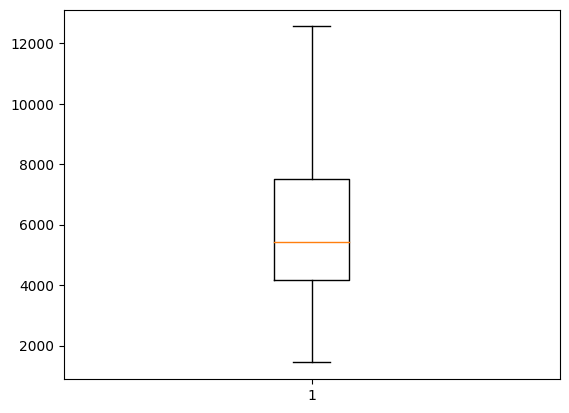

In [44]:
plt.boxplot(data['TotalIncome'])
plt.show()

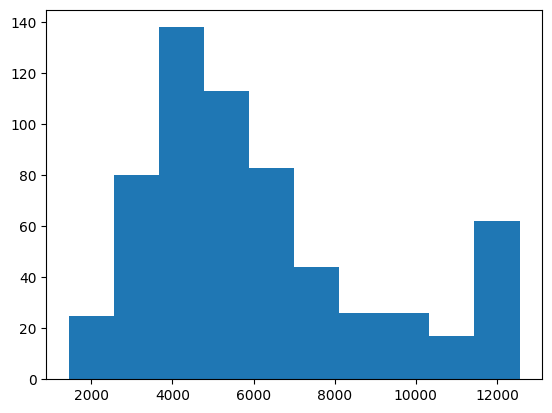

In [45]:
plt.hist(data['TotalIncome'])
plt.show()

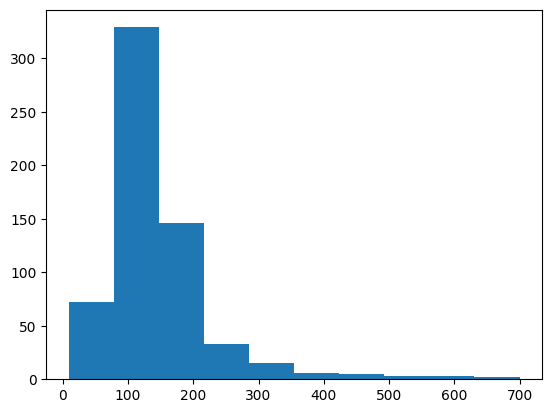

In [46]:
plt.hist(data['LoanAmount'])
plt.show()

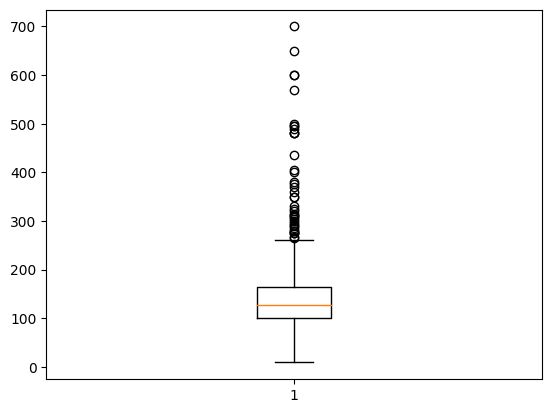

In [47]:
plt.boxplot(data['LoanAmount'])
plt.show()

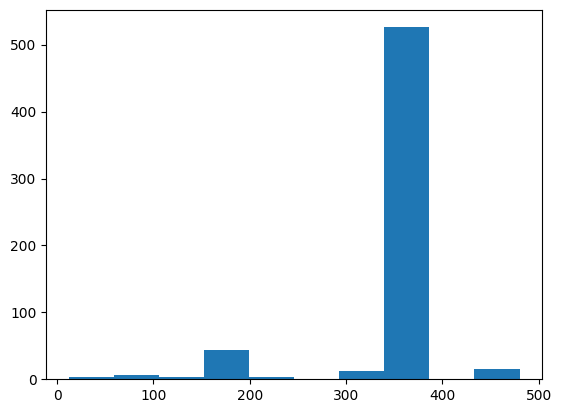

In [48]:
plt.hist(data['Loan_Amount_Term'])
plt.show()

**Encoding**

In [30]:
# encoding categorical variables as numerical values (e.g. male is 1)
from sklearn.preprocessing import LabelEncoder

variableMod = ['Gender', 'Married','Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()

for i in variableMod:
    data[i] = le.fit_transform(data[i])

data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

**Scaling**

In [51]:
#Applying MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term', 'TotalIncome']] = scaler.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'TotalIncome']].values)

In [53]:
#Applying Robust Scaler
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
data[['LoanAmount']]=sc.fit_transform(data[['LoanAmount']].values)

In [54]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1,0,0,0,0,0.070489,0.000000,0.031008,0.74359,1.0,2,1,0.396549
1,LP001003,1,1,1,0,0,0.054830,0.036192,0.000000,0.74359,0.0,0,0,0.418325
2,LP001005,1,1,0,0,1,0.035250,0.000000,-0.961240,0.74359,1.0,2,1,0.140191
3,LP001006,1,1,0,1,0,0.030093,0.056592,-0.124031,0.74359,1.0,2,1,0.314846
4,LP001008,1,0,0,0,0,0.072356,0.000000,0.201550,0.74359,1.0,2,1,0.410136


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

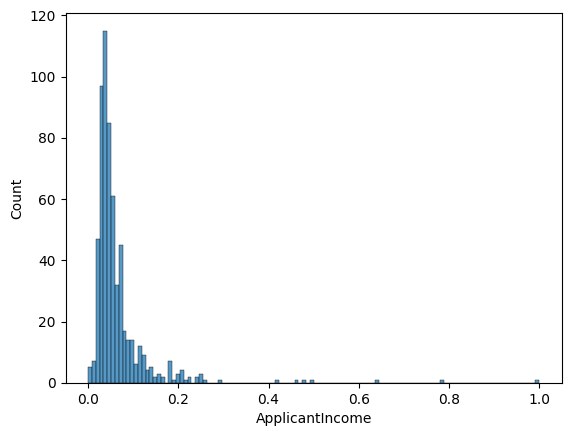

In [57]:
#Checking whether Scaling worked
sns.histplot(data['ApplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

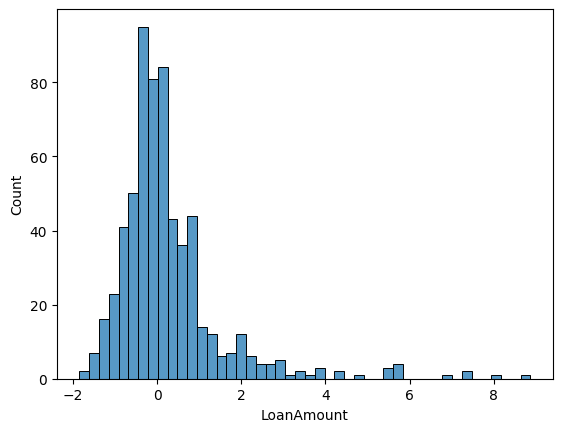

In [60]:
#Checking whether Scaling worked
sns.histplot(data['LoanAmount'])